In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [6]:
# Reading the data
path_to_demographic_data = '../SVJ/Python/Riddle_J_Shweta_8_9_2024.xlsx'
path_to_birthing_data = '../../original_data/StillBirth/Copy of Riddle_J_Stillbirth_07262024_shweta_Edits.xlsx'
path_to_svi_data = '../../original_data/NorthCarolina_county_SVI_2022.csv'

# get the data frames 

df_normal_birth_demo = pd.read_excel(path_to_demographic_data, sheet_name='NORMAL_MOM_DEMOG_CDWH')
df_stillbirth_demo = pd.read_excel(path_to_demographic_data, sheet_name='STILL_BIRTH_DEMOG')
df_svi_2022 = pd.read_csv(path_to_svi_data, usecols = ["COUNTY"]) ### add the rest of five columns



In [7]:
df_svi_2022

,COUNTY
0,Alamance County
1,Alexander County
2,Alleghany County
3,Anson County
4,Ashe County
5,Avery County
6,Beaufort County
7,Bertie County
8,Bladen County
9,Brunswick County


In [10]:

# get the birth year for still births
df_still_birth_year = (pd.read_excel(path_to_birthing_data, sheet_name='#Still_Births_shweta_edit')
                       [['medical_record_number', 'diagnosis_year']]
                       .drop_duplicates(
                           subset=['medical_record_number'], 
                           keep='first')
)

# get the birth year for normal birth
df_normal_birth_year = (
    pd.read_excel(path_to_birthing_data, sheet_name='NORMAL_MOM_DEMOG_STORK')
    [['Mom MRN', 'Birth Date']]
    .assign(
        birth_year=lambda x: pd.to_datetime(x['Birth Date'], errors='coerce').dt.year
    )
    .dropna(subset=['birth_year'])  # Drop rows where birth_year is NaN
    .assign(birth_year=lambda x: x['birth_year'].astype(int))  # Convert the year to int after handling NaNs
    .query('birth_year > =2014') # filter rows where birth year is greater than 2014
    .rename(columns={'Mom MRN': 'medical_record_number'})
    .drop_duplicates(subset=['medical_record_number'], keep='first')
    [['medical_record_number', 'birth_year']]
)



df_normal_birth_year.to_csv('normal_birth_year.csv', index=False)   
df_still_birth_year.to_csv('still_birth_year.csv', index=False)

In [26]:
mrns_normal_birth_before_2024 = df_normal_birth_year[df_normal_birth_year.birth_year < 2024]["medical_record_number"].to_list()
mrns_normal_birth_before_2024 

AttributeError: 'Series' object has no attribute 'to_int'

In [ ]:
# get the mrns for those who only had normal birth before 2024
list_mrn_normal_before_2024 = df_normal_birth_year.query('birth_year < 2024')['medical_record_number'].tolist()

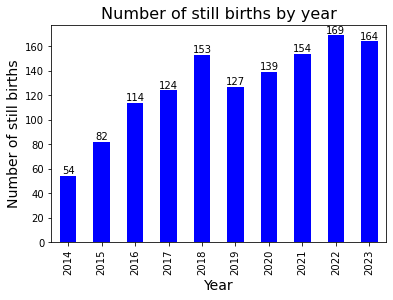

In [4]:
# Generate a column chart for the number of still births by year

# fig, ax = plt.subplots(figsize=(10, 6))
df_still_birth_year['diagnosis_year'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Number of still births by year', fontsize=16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of still births', fontsize = 14)

# Add numbers on top of the columns
for i, v in enumerate(df_still_birth_year['diagnosis_year'].value_counts().sort_index()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

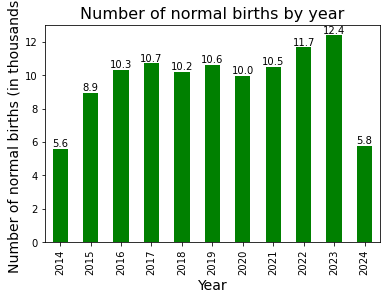

In [5]:
# Generate a column chart for the number of normal births by year
fig, ax = plt.subplots(figsize=(6, 4))

df_normal_birth_year['birth_year'].value_counts().div(1000).sort_index().plot(kind='bar', color='green')

plt.title('Number of normal births by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of normal births (in thousands)', fontsize=14)

# Add number (in thousands) to the top of the columns
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [6]:
# Add a column to each dataframe to indicate the stillbirth status
df_stillbirth_demo['still_birth'] = 1
df_normal_birth_demo['still_birth'] = 0

In [12]:
df_normal_birth_demo.columns

Index(['Medical Record Number', 'Patient Full Name', 'Patient Birth Date',
       'Patient Gender', 'Patient Current Age', 'DEI Age Group', 'DEI Race',
       'Patient Race', 'Patient Death Date/Time', 'Preferred Language',
       'Patient Marital Status', 'Patient Type', 'Sexual Orientation',
       'Patient Ethnicity', 'DEI Ethnicity', 'Employment Status',
       'Patient County', 'Patient Postal/Zip Code'],
      dtype='object')

In [25]:
_ = df_normal_birth_demo[df_normal_birth_demo['Medical Record Number'].isin((mrns_normal_birth_before_2024))]
print(df_normal_birth_demo.shape)
print(_.shape)

df_normal_birth_demo.info()


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [7]:
# Check the duplications in both data frame 

print("Duplicated MRN in the still birth dataframe:", df_stillbirth_demo['Medical Record Number'].duplicated().sum())
print("Duplicated MRNin the normal birth dataframe:", df_normal_birth_demo['Medical Record Number'].duplicated().sum())


Duplicated MRN in the still birth dataframe: 0
Duplicated MRNin the normal birth dataframe: 0


In [8]:
# Any overlapped MRNs between the two dataframes?
overlapped = (df_stillbirth_demo['Medical Record Number']
              .isin(df_normal_birth_demo['Medical Record Number']))

# Get the overlapped MRNs as a list
mrns_in_both_normal_still_birth = (df_stillbirth_demo['Medical Record Number']
                                   [overlapped]
                                   .to_list()
                                   )

# get the count of total still birth records
total_still_birth = df_stillbirth_demo['Medical Record Number'].count()


# print out the results!

print("Total still birth records:", total_still_birth)
print("MRNs in both normal and still birth dataframes:", len(mrns_in_both_normal_still_birth))

Total still birth records: 1274
MRNs in both normal and still birth dataframes: 1097


In [9]:
df_normal_birth_year['medical_record_number'] = pd.to_numeric(df_normal_birth_year['medical_record_number'], errors='coerce')

df_normal_birth_demo = (df_normal_birth_demo.merge(df_normal_birth_year, 
                                  left_on = 'Medical Record Number', 
                                  right_on='medical_record_number', 
                                  how='left')
       .drop(columns=['medical_record_number'])
       
)

In [10]:
df_still_birth_demo= (df_stillbirth_demo.merge(df_still_birth_year,
                                    left_on='Medical Record Number',
                                    right_on='medical_record_number',
                                    how='left')
            .drop(columns=['medical_record_number'])
            .rename(columns={'diagnosis_year': 'birth_year'}) # rename diagnosis_year to birth_year
    
    
)


In [11]:
# Info of the data frames
print("Normal birth data frame:")
print(df_normal_birth_demo.info())

print("\nStill birth data frame:")
print(df_stillbirth_demo.info())

Normal birth data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106716 entries, 0 to 106715
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Medical Record Number    106716 non-null  int64         
 1   Patient Full Name        106716 non-null  object        
 2   Patient Birth Date       106716 non-null  datetime64[ns]
 3   Patient Gender           106716 non-null  object        
 4   Patient Current Age      106716 non-null  int64         
 5   DEI Age Group            106716 non-null  object        
 6   DEI Race                 106716 non-null  object        
 7   Patient Race             106716 non-null  object        
 8   Patient Death Date/Time  260 non-null     datetime64[ns]
 9   Preferred Language       106716 non-null  object        
 10  Patient Marital Status   106716 non-null  object        
 11  Patient Type             2 non-null       object     

In [12]:
# Concatenate  the two DataFrames
df_concat_demo = pd.concat([df_normal_birth_demo, df_stillbirth_demo], ignore_index=True)

In [13]:
# Add a flag column to indicate whether the MRNs are in both dataframes
df_concat_demo['in_both'] = df_concat_demo['Medical Record Number'].isin(mrns_in_both_normal_still_birth)

In [14]:
# print out the results showing whether the MRNs are in both dataframes
# Please note that the 'in_both' column is a boolean column 
# and double the true overlapped MRNS due to the data concatenation
print("Total number of positive values in flag column:", df_concat_demo['in_both'].sum())

Total number of positive values in flag column: 2194


In [15]:
# break down the county classification into 3 categories: urban, suburban, and rural
# https://www.ncruralcenter.org/county-data/ data source accessed 8/16/2024
nc_counties_classification = {
    "ALAMANCE": "SUBURBAN", "ALEXANDER": "RURAL", "ALLEGHANY": "RURAL", "ANSON": "RURAL",
    "ASHE": "RURAL", "AVERY": "RURAL", "BEAUFORT": "RURAL", "BERTIE": "RURAL", 
    "BLADEN": "RURAL", "BRUNSWICK": "RURAL", "BUNCOMBE": "SUBURBAN", "BURKE": "RURAL", 
    "CABARRUS": "SUBURBAN", "CALDWELL": "RURAL", "CAMDEN": "RURAL", "CARTERET": "RURAL", 
    "CASWELL": "RURAL", "CATAWBA": "SUBURBAN", "CHATHAM": "RURAL", "CHEROKEE": "RURAL", 
    "CHOWAN": "RURAL", "CLAY": "RURAL", "CLEVELAND": "RURAL", "COLUMBUS": "RURAL", 
    "CRAVEN": "RURAL", "CUMBERLAND": "SUBURBAN", "CURRITUCK": "RURAL", "DARE": "RURAL", 
    "DAVIDSON": "SUBURBAN", "DAVIE": "RURAL", "DUPLIN": "RURAL", "DURHAM": "URBAN", 
    "EDGECOMBE": "RURAL", "FORSYTH": "URBAN", "FRANKLIN": "RURAL", "GASTON": "SUBURBAN", 
    "GATES": "RURAL", "GRAHAM": "RURAL", "GRANVILLE": "RURAL", "GREENE": "RURAL", 
    "GUILFORD": "URBAN", "HALIFAX": "RURAL", "HARNETT": "RURAL", "HAYWOOD": "RURAL", 
    "HENDERSON": "SUBURBAN", "HERTFORD": "RURAL", "HOKE": "RURAL", "HYDE": "RURAL", 
    "IREDELL": "SUBURBAN", "JACKSON": "RURAL", "JOHNSTON": "SUBURBAN", "JONES": "RURAL", 
    "LEE": "RURAL", "LENOIR": "RURAL", "LINCOLN": "SUBURBAN", "MACON": "RURAL", 
    "MADISON": "RURAL", "MARTIN": "RURAL", "MCDOWELL": "RURAL", "MECKLENBURG": "URBAN", 
    "MITCHELL": "RURAL", "MONTGOMERY": "RURAL", "MOORE": "RURAL", "NASH": "RURAL", 
    "NEW HANOVER": "URBAN", "NORTHAMPTON": "RURAL", "ONSLOW": "SUBURBAN", "ORANGE": "SUBURBAN", 
    "PAMLICO": "RURAL", "PASQUOTANK": "RURAL", "PENDER": "RURAL", "PERQUIMANS": "RURAL", 
    "PERSON": "RURAL", "PITT": "SUBURBAN", "POLK": "RURAL", "RANDOLPH": "RURAL", 
    "RICHMOND": "RURAL", "ROBESON": "RURAL", "ROCKINGHAM": "RURAL", "ROWAN": "SUBURBAN", 
    "RUTHERFORD": "RURAL", "SAMPSON": "RURAL", "SCOTLAND": "RURAL", "STANLY": "RURAL", 
    "STOKES": "RURAL", "SURRY": "RURAL", "SWAIN": "RURAL", "TRANSYLVANIA": "RURAL", 
    "TYRRELL": "RURAL", "UNION": "SUBURBAN", "VANCE": "RURAL", "WAKE": "URBAN", 
    "WARREN": "RURAL", "WASHINGTON": "RURAL", "WATAUGA": "RURAL", "WAYNE": "RURAL", 
    "WILKES": "RURAL", "WILSON": "RURAL", "YADKIN": "RURAL", "YANCEY": "RURAL"
}
# mapping county to classifications
df_concat_demo['county_classification'] = df_concat_demo['Patient County'].str.upper().map(nc_counties_classification).fillna('UNKNOWN')

# save the preferred language as ENGLISH, SPANISH, NON_ENGLISH,and UNKNOWN
df_concat_demo['Preferred Language'] = df_concat_demo['Preferred Language'].str.upper().map(
    {'ENGLISH': 'ENGLISH', 'SPANISH':'SPANISH', 'UNKNOWN': 'UNKNOWN'}).fillna('NON_ENGLISH_SPANISH')
df_concat_demo['Preferred Language'].value_counts()

# restrict age to 15-55
df_concat_demo = (df_concat_demo[(df_concat_demo['Patient Current Age'] >= 15) 
                                 & (df_concat_demo['Patient Current Age'] < 55)]
)

print(df_concat_demo.shape)
# Define new age groups, 15-19, 20-29, 30-39, 40-44, 45-49, and 50-54
df_concat_demo['New Age Group'] =( pd.cut(df_concat_demo['Patient Current Age'],
                                         bins=[15, 20, 30, 40, 45, 50, 55],
                                         labels=['15-19', '20-29', '30-39', '40-44', '45-49', '50-54'])

)

### Mapping employment status
employment_status_map = {'NOT EMPLOYED': "Unemployed",
                         'FULL TIME': "Employed", 
                         np.nan: np.nan,
                         'DISABLED': "Unemployed",
                         'PART TIME': "Employed",
                         'UNKNOWN': "Unknown",
                         'SELF EMPLOYED': "Employed",
                         'RETIRED': "Unemployed",
                         'TEMPORARILY UNEMPLOYED': "Unemployed",
                         'STUDENT - FULL TIME': "Student",
                         'OTHER ': "Other",
                         'LEAVE OF ABSENCE': "Unemployed",
                         'CONTRACT': "Employed",
                         'STUDENT - PART TIME': "Student",
                         'ON ACTIVE MILITARY DUTY': "Employed"}

df_concat_demo['Employment Status'] = df_concat_demo['Employment Status'].str.upper().map(employment_status_map)

### Mapping sexual orientation
sexual_orientation_map = {'*UNSPECIFIED': 'Unknown',
                          'STRAIGHT': 'Straight',
                          'BISEXUAL': 'Sexual Minority',
                          "DON’T KNOW": 'Unknown',
                          "CHOOSE NOT TO DISCLOSE": 'Unknown',
                          "LESBIAN OR GAY": 'Sexual Minority',
                          "SOMETHING ELSE": 'Sexual Minority', 
                          "STRAIGHT (NOT LESBIAN OR GAY)": 'Straight',}

df_concat_demo['Sexual Orientation'] = df_concat_demo['Sexual Orientation'].str.upper().map(sexual_orientation_map).fillna('Unknown')

### Mapping Patient Marital Status
marital_status_map = {'MARRIED': 'Partnered',
                       'SINGLE': 'Single',
                       '*UNSPECIFIED': 'Unknown',
                       'LEGALLY SEPARATED': 'Separated/Divorced/Widowed',
                       'WIDOWED': 'Separated/Divorced/Widowed',
                       'DIVORCED': 'Separated/Divorced/Widowed',
                       'DOMESTIC PARTNER': 'Partnered',
                       'UNKNOWN': 'Unknown'}

df_concat_demo['Patient Marital Status'] = df_concat_demo['Patient Marital Status'].str.upper().map(marital_status_map).fillna('Unknown')

(107897, 22)


In [16]:
# Generating an alternative dataframe keeping all stillburth records and remove duplicated MRNs

# sort the dataframe by 'still_birth' column and medical record number
df_concat_demo = df_concat_demo.sort_values(by=['Medical Record Number', 'still_birth'])
df_concat_demo_no_dup = df_concat_demo.drop_duplicates(subset='Medical Record Number', keep='last')

df_concat_demo_no_dup.shape

(106802, 23)

### Merge with SVI county level data

In [ ]:
# Merge with county level SVI data


In [17]:
!pip install -q tableone

from tableone import TableOne

columns =[ 'Patient Current Age', 'New Age Group', 'DEI Race', 'Preferred Language',
       'Patient Marital Status', 'Sexual Orientation', 'DEI Ethnicity', 'Employment Status',
       # 'Patient County', 
       'county_classification', 'still_birth']

groupby = ['still_birth']

categorical = ['New Age Group', 'DEI Race', 'DEI Ethnicity', 'Preferred Language',
       'Patient Marital Status', 'Sexual Orientation','Employment Status',
       # 'Patient County'
       'county_classification']

continuous = ['Patient Current Age']

nonnormal = ['Patient Current Age']

tableone = TableOne(df_concat_demo, columns=columns, groupby=groupby, categorical = categorical, pval = True)

In [18]:
# Generate a tableone for the non-duplicated dataframe

tableone = TableOne(df_concat_demo_no_dup, 
                    columns=columns, 
                    groupby=groupby, 
                    categorical = categorical, 
                    nonnormal = nonnormal,
                    pval = True
                    )

print(tableone.tabulate(tablefmt="github"))
tableone.to_html('tableone.html')

|                                     |                                           | Missing   | Overall          | 0                | 1                | P-Value   |
|-------------------------------------|-------------------------------------------|-----------|------------------|------------------|------------------|-----------|
| n                                   |                                           |           | 106802           | 105565           | 1237             |           |
| Patient Current Age, median [Q1,Q3] |                                           | 0         | 34.0 [29.0,39.0] | 34.0 [29.0,39.0] | 34.0 [29.0,39.0] | 0.229     |
| New Age Group, n (%)                | 15-19                                     | 19        | 1791 (1.7)       | 1775 (1.7)       | 16 (1.3)         | 0.009     |
|                                     | 20-29                                     |           | 30714 (28.8)     | 30321 (28.7)     | 393 (31.8)       |           |
|         

In [19]:
# export the data
from datetime import date
save_file_path = f'../../clean_data/still_birth_vs_normal_birth{date.today()}.csv'
df_concat_demo_no_dup.to_csv(save_file_path, index=False)
